<img   src="../figuras/logo/TalentQ_LogoPosNegro.png" align=center  width="12%"/>
<br>

<table width="100%">
<td style="font-size:400%px;font-style:italic;text-align:right;background-color:rgba(0, 160, 120,0.6)">
El arte de medir I
</td></table>



$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\tr}{{\rm tr}} $
$ \newcommand{\Hil}{{\mathbb H}} $
$ \newcommand{\boldn}{{\bf n}} $

- [Medidores de 1 cúbit](#uncubit)


- [La moneda cuántica](#moneda)


- [Medidas en una base general](#basegeneral)


- [Valores esperados](#vevs)

<a id='uncubit'></a>
<table width="100%">
    <td style="font-size:250%px; font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
<b>Medidas de 1 cúbit</b>
</table>

### Medidas en la base computacional

El aparato de medida estándar en computación cuántica asigna valores $\{0,1\}$ a los kets $\ket{0}$ y $\ket{1}$ de la base computacional
<br>
<br>
<br>


<div>
<img src="images/cubit_meter2.png" width="25%" style="margin:auto"/>
</div>
donde $a = 0,1$ 

En general, el estado es destruido en la medida, por lo que se suele omitir el hilo cuántico a su salida
<br>
<br>
<div>
<img src="images/cubit_meter1.png" width="30%" style="margin:auto"/>
</div>



Los elementos de la base computacional $\ket{a}\in \{\ket{0},\ket{1}\}$, son autoestados del *observable* $Z = \sigma_z $, cuyos autovalores son $+1$ y $-1$ respectivamente cumplen

<br>
$$
Z\ket{0} = +\ket{0}~~~~,~~~~~ Z\ket{1} = -\ket{1}
$$ 

<br>



Podemos unificar ambos resultados como: $Z\ket{a} = (-1)^a\ket{a}$, 
con  $a=\{0,1\}$.

### Medidas en un simulador

Se trata de un programa clásico que **simula** un circuito cuántico utilizando las leyes de la Mecánica Cuántica. El resultado de un circuito calculado con qasm_simulator sólo se puede obtener mediante un aparato de medida que, usado repetidas veces nos permitirá reconstruir el estado de manera estadística.

In [1]:
from qiskit import QuantumRegister,QuantumCircuit
from qiskit import Aer, execute 
M_simulator = Aer.get_backend('qasm_simulator')

qc=QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)

# opción 1
job=execute(qc,backend=M_simulator,shots=2048) # Hacemos la simulación 2048 veces )
result=job.result()
counts=result.get_counts()

# opción 2
#qcobj = transpile(qc, M_simulator )      # Crea un objeto compilado a partir del circuito  
#job = M_simulator.run(qcobj, shots=2048) # Hacemos la simulación 2048 veces 
#resultado = job.result()                 # Obtenemos los resultados

print(counts)

{'0': 1036, '1': 1012}


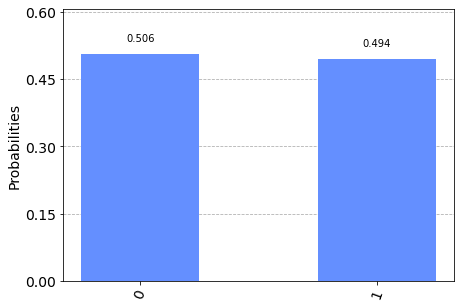

In [2]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts) # Mostramos un histograma de resultados

### Medidas en un ordenador cuántico real

Una vez que hemos verificado que el programa 
corre bien en nuestro simulador, podemos lanzarlo a un ordenador cuántico real sin más que cambiar el *backend*.

In [3]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

antes de enviar un trabajo es conveniente consultar qué máquina de las adecuadas a nuestras necesidades es la que está más libre

In [4]:
from qiskit.providers.ibmq import least_busy
IBMQ_best_backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 1 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", IBMQ_best_backend)

least busy backend:  ibmq_belem


Ahora compilamos y enviamos el trabajo

In [5]:
qobj = transpile(qc, IBMQ_best_backend)           # Compila el código para el backend
job = IBMQ_best_backend.run(qobj, shots=1024) # Hacemos la simulación 1024 veces 

NameError: name 'transpile' is not defined

podemos monitorizar la ejecución

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

extraemos el resultado

In [ ]:
counts = job.result().get_counts()
print("Cuentas=",counts)

In [ ]:
plot_histogram(counts)

<a id='moneda'></a>
<table width="100%">
    <td style="font-size:250%px;font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
<b>La moneda cuántica</b>
</table>   

El resultado de tirar una moneda al aire es una variable aleatoria con dos resultados equiprobables:  cara y cruz. 

Es irrelevante si analizamos el resultado cada tirada o cada dos, o tres tiradas. Las frecuencias relativas de caras y cruces, siempre serán próximas a $1/2$. 

Podemos imaginar un experimento similar con un cúbit, donde cara $\to 0$ y cruz $\to 1$ son los resultados posibles de la medida en la base $Z$.

Tirar la moneda cuántica es aplicar el operador $H$ al resultado de una tirada anterior. 


Ahora no es lo mismo medir el resultado después de una tirada

$$
\ket{0}~ \stackrel{\rm tirar}{\longrightarrow} ~ H \ket{0}= \ket{+} ~ \stackrel{\rm medir}{\longrightarrow} ~p(0) = p(1) = 0.5
$$

que hacerlo después de dos tiradas

$$
\ket{0}~ \stackrel{\rm tirar}{\longrightarrow} ~ H \ket{0}~ \stackrel{\rm tirar}{\longrightarrow} H^2\ket{0} = \ket{0} ~ \stackrel{\rm medir}{\longrightarrow} ~p(0) = 1 ~,~p(1) = 0
$$

In [ ]:
from qiskit import Aer, QuantumCircuit, execute

qc = QuantumCircuit(1,1)

qc.h(0)
qc.measure(0,0) #anula o no esta medición intermedia para ver la diferencia
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

Ejecutemos el circuito con y sin medición intermedia

In [ ]:
M_simulator = Aer.get_backend('qasm_simulator')

execute(qc,M_simulator).result().get_counts()

La medición intermedia destruye la superposición y hace colapsar el estado a $\ket{0}$  ó $\ket{1}$. Sin dicha medición, las amplitudes de probabilidad para obtener $\ket{1}$ a partir de $\ket{0}$ interfieren destructivamente

<a id='basegeneral'></a>
<table width="100%">
    <td style="font-size:250%px;font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
<b>Medidas en una base general</b>
</table>  

### Bases $X$, $Y$ y $Z$

A parte de la base computacional $\{\ket{0},\ket{1} \}$, es muy necesario y frecuente el uso de otras bases ortonormales como  $\{\ket{+},\ket{-} \}$ ó  $\{\ket{+i},\ket{-i} \}$. 

Todas ellas diagonalizan algún operador de Pauli y, por  tanto, puede servir para construir aparatos de medida que discriminen
entre sus estados

<br>

\begin{eqnarray}
Z \ket{0} =+ \ket{0}   ~~~~~~~~~~~~&,& ~~~~~~~~~~ Z \ket{1} =-\ket{1} \\ \rule{0mm}{15mm}
X \ket{+} =+ \ket{+}   ~~~~~~~~~~~&,& ~~~~~~~~~~ X \ket{-} =-\ket{-} \\ \rule{0mm}{15mm}
Y \ket{+i} =+ \ket{+i}   ~~~~~~~~&,&~~~~~~~ Y \ket{-i} =-\ket{-i} \\
\end{eqnarray}


Supongamos que <b>sólo</b> contamos con un aparato de medida en la base computacional    de autoestados de $\sigma_z$.

¿Cómo podríamos utilizar  dicho aparato para efectuar medidas en las bases de autoestados de $\sigma_x$ y $\sigma_y$?


Por ejemplo desearíamos definir un aparato de medida que "leyese" los valores $0$ y $1$ para los autoestados $\ket{\pm}$ del opeador $\sigma_x =  X$

<br>
<br>
<div>
<img src="images/meter_xbasis.png" width="30%" style="margin:auto"/>
</div>
<br>

y análogamente para los autoestados $\ket{\pm i}$ de $\sigma_y = Y$

La clave está en el circuito de cambio de base 

\begin{eqnarray}
\ket{+}  = H\ket{0}   ~~~~~~~~~~ &,&   ~~~~~~~~~~~~  \ket{-}  = H\ket{1}    \\ \rule{0mm}{6mm}
 \ket{+i}  = SH \ket{0}   ~~~~~~~~~~ &,& ~~~~~~~~  \ket{-i}  = SH\ket{1}   
\end{eqnarray}

Esto implica que los operadores de los cuales estas bases son autestados cambian de acuerdo con 

$$
X = H Z H ~~~~~~~,~~~~~~~Y = S  H  Z   H S^\dagger
$$

*Verifiquemos:* por ejemplo
$$
Y \ket{-i} = (SHZHS^\dagger )(SH\ket{0}) = SH Z\ket{1} =  SH(-\ket{1})= - SH\ket{1} = -\ket{-i}
$$
    


<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
comprueba estas ecuaciones de cambio de base.
</div>

Estas relaciones son exactamente las que permiten modificar el aparato de medida

<br>
<br>
<div>
<img src="images/meter_xybasis.png" width="70%" style="margin:auto"/>
</div>
<br>


Esto nos permite definir el aparato de medida efectivo en las direcciones $x$ e $y$

<br>
<br>

<div>
<img src="images/meter_xybasis2.png" width="70%" style="margin:auto"/>
</div>
<br>


Cuando la medida es destructiva no es necesario añadir los operadores después del aparato de medida 

In [39]:
from qiskit import QuantumCircuit
from qiskit import Aer, execute 

def measureXYZ(qc,axis="Z"):

    if axis == "Z":
        qc.measure(0,0)
    if axis == "X":
        qc.h(0)
        qc.measure(0,0) 
        qc.h(0)
    elif axis == "Y":
        qc.sdg(0)
        qc.h(0)
        qc.measure(0,0) 
        qc.h(0)
        qc.sdg(0)

    counts=execute(qc,backend=Aer.get_backend('qasm_simulator'),shots=1024).result().get_counts()
    return counts

Ahora podemos observar el resultado de medidas sucesivas a lo largo de ejes diferentes

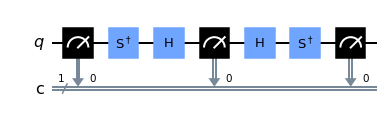

In [46]:

qc = QuantumCircuit(1,1)
# el estado inicial es |0>

cuentas = measureXYZ(qc,axis="Z")
cuentasy = measureXYZ(qc,axis="Y")
cuentasz = measureXYZ(qc,axis="Z")

qc.draw('mpl')

vamos a ver las distribuciones muestrales en cada detector

In [47]:
print("cuentas(init, base Z)=",cuentas)
print("ccuentas(base Y)=",cuentasy)
print("cuentas( base Z)=",cuentasz)

cuentas(init, base Z)= {'0': 1024}
ccuentas(base Y)= {'0': 517, '1': 507}
cuentas( base Z)= {'0': 510, '1': 514}


En particular observamos que la medida en la base $Y$ modifica la distribución inicial de probabilidades asociada al autoestado $\ket{0}$. 

Este es el experimento de Stern Gerlach con polarizadores sucesivos en direcciones ortogonales.

### Base arbitraria

Vamos a generalizar el análisis anterior. Recordemos que el operador

$$
U(\theta,\phi,0)=\begin{bmatrix}   \cos \displaystyle\frac{\theta}{2}  & -  \sin\displaystyle\frac{\theta}{2}  \\ 
\rule{0mm}{4mm} e^{i\phi} \sin \displaystyle\frac{\theta}{2} &e^{i\phi} \cos \displaystyle\frac{\theta}{2} \end{bmatrix}
$$

lleva la base $\{\ket{0},\ket{1}\}_{\hat{\bf z}}$ a la base $\{\ket{0},\ket{1}\}_{\hat{\bf n}},$ asociada a un vector 
<br>
<br>
$$
\hat{\bf n}(\theta,\phi) = \sin\theta\cos\phi\, \hat{\bf x} + \sin\theta\sin\phi\, \hat{\bf y}  + \cos\theta\, \hat{\bf z}
$$
<br>
<br>

<div>
<img src="images/BlochSphere_basis.png" width="30%" style="margin:auto"/>
</div>
<br>


Es decir, tenemos 
$$
\ket{a}_{\hat\boldn} = U(\theta,\phi,0) \ket{a}_{\hat{\bf z}}~~~~~~~~a = 0,1
$$
<br>
que verifica la ecuación de autovalores

$$
\sigma_z \ket{a}_{\hat{\bf z}} = (-1)^a \ket{a}_{\hat{\bf z}} ~~~\Rightarrow ~~~({\hat\boldn}\cdot\boldsymbol{\sigma})\,  \ket{a}_{\hat\boldn} = (-1)^a \ket{a}_{\hat\boldn }
$$

Por esta razón, etiquetaremos
$$
  U(\theta,\phi,0) ~ \equiv ~ U(z\to \hat{\bf n})
$$
<br>

El circuito siguiente  *simula* un aparato de medición en la base $\{\ket{a}_{\hat{\bf n}}\}_{a=0,1}$

<br>
<br>
<img src="images/nbasis_measure2.png" width="50%" style="margin:auto"/>
</div>
<br>

<div class="alert alert-block alert-warning">
Usando un ejercicio anterior tenemos que  
\begin{eqnarray}
 U(\pi/2,0,\pi)=H : \ket{a}_{\hat{\bf z}} \to \ket{a}_{\hat{\bf x}} \\ \rule{0mm}{8mm}
 U(\pi/2,\pi/2,\pi)= SH  : \ket{a}_{\hat{\bf z}} \to \ket{a}_{\hat{\bf y}}
\end{eqnarray}

la notación  ahora incluye los casos anteriores
<br>

$$ \ket{\pm} =  \ket{a}_{\hat{\bf x}} = H \ket{a}_{\hat{\bf z}} ~~~~,~~~~  \ket{\pm i} = \ket{a}_{\hat{\bf y}} = SH \ket{a}_{\hat{\bf z}} ~~~~~~~~a = 0,1$$  
   

</div>


<a id='vevs'></a>
<table width="100%">
    <td style="font-size:250%px;font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
<b>Valores esperados</b>
</table>

Una repetición de medidas de un estado $\ket{\psi} = c_0\ket{0} + c_1\ket{1}$ permite tener acceso estadístico a las amplitudes de probabilidad 



$$
p_0 = \frac{n_{0}}{N} = |c_0|^2 = |\braket{0}{\psi}|^2~~~~~~~~~~~~~~~~ p_1 = \frac{n_{1}}{N}=|c_1|^2 =  |\braket{1}{\psi}|^2 \, .
$$
<br>

Este procedimiento de reconstrucción es la base de la **tomografía cuántica**.

p_0= 0.939 , p_1= 0.061


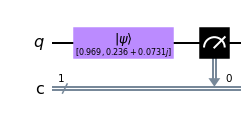

In [48]:
from qiskit import QuantumCircuit
from qiskit import Aer, execute 
import numpy as np

# creamos el circuito
qc = QuantumCircuit(1,1)
shots= 1000

# inicializamos un estado arbitrario en la esfera de Bloch
theta = 0.5  #rad
phi   = 0.3  #rad

psi_state = [np.cos(theta/2),(np.exp(1j*phi))*np.sin(theta/2)]
#print(psi_state)
print('p_0=', np.round(np.abs(psi_state[0])**2,3),', p_1=', np.round(np.abs(psi_state[1])**2,3))

# inicializamos el estado de entrada  
qc.initialize(psi_state,0)
qc.measure(0,0)

qc.draw('mpl')

vamos a recuperar las probabilidades haciendo estadística

In [49]:
M_simulator = Aer.get_backend('qasm_simulator')
shots=100000
counts=execute(qc,backend=M_simulator,shots=shots).result().get_counts()


def get_prob_dist(counts): # counts es un diccionario 
    N=sum([n for n in counts.values()]) # numero de shots
    prob_dist = {bit:np.round(v/N,4) for bit,v in counts.items()} # this is a modified dictionary
    if len(prob_dist) == 1:  # we are two amplitudes (one qubit), so in this case, pad with a 0
        prob_dist.append(0)
    return prob_dist


prob_distr = get_prob_dist(counts)
print("probability distribution =", prob_distr)


probability distribution = {'1': 0.0611, '0': 0.9389}


## Valor esperado de un observable

Cualquier observable sobre un cúbit $A = A^\dagger$ puede expresarse en la base

$$
A = a I + n_x X + n_y Y  + n_z Z \, . 
$$


Los coeficientes se obtienen haciendo uso de la relación $\to \frac{1}{2}\tr \sigma_i \sigma_j = \delta_{ij}$. Es decir

$$
n_i = \frac{1}{2} \tr \, (A \sigma_i)
$$

donde $\boldsymbol{\sigma} = (\sigma_x,\sigma_y,\sigma_z) = (X,Y,Z).$

Entonces, podremos obtener el valor esperado de $A$  si somos capaces de medir el de $X,$ $Y$ y $Z$.

$$
\langle A\rangle_\psi = a + n_x \langle X\rangle_\psi + n_y \langle Y\rangle_\psi + n_z \langle Z\rangle_\psi
$$


### $\langle Z \rangle_{\psi}$

Los estados de la base computacional son autoestados del operador $Z$ con autovalor $\pm 1$
<br>

$$
Z \ket{0} =+ \ket{0}   ~~~~~~~~ ~~~~~~~~~~ Z \ket{1} =-\ket{1} 
$$


Dado un estado $\ket{\psi} = c_0\ket{0} + c_1\ket{1}$, la medida repetida arroja de forma aleatoria los valores propios de $Z \to \pm 1$ con frecuencias relativas $+1\to n^Z_0 $ y $-1\to n^Z_1$ respectivamente. 


Por definición, el valor medio de dicha variable es, 

$$
\langle Z \rangle_\psi = +\frac{n^Z_0}{N}- \frac{ n^Z_1}{N}
$$


Circuito necesario para medir $\langle Z\rangle_\psi$ 
<br>
<div>
<img src="images/cubit_meter1.png" width="30%" style="margin:auto"/>
</div>


In [ ]:
mean_Z = 0

for bits, probs  in prob_distr.items():
    mean_Z += (-1)**(int(bits)) * probs  

print('<Z> =',np.round(mean_Z,5))

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
genera un observable arbitrario $A$ y calcula los valores esperados $\bra{0}A\ket{0}$, $\bra{-}A\ket{-}$ y 
 $\bra{+i}A\ket{+i}$.
</div>

### $\langle X \rangle_{\psi}$

Igualmente, si medimos el estado $\ket{\psi}$ con un medidor asociado al operador $X = HZH$, la repetición arrojará igualmente una muestra aleatoria de valores propios de $X\to \pm 1$ con frecuencias relativas $+1\to n^X_0$ y $-1\to n^X_1$.

El valor esperado de $X$  obtiene del promedio

$$
\langle X \rangle_\psi = +\frac{n^X_0}{N}- \frac{ n^X_1}{N}
$$



Ya hemos visto cuál es el circuito necesario para  medir en la base $X$ 
<br>
<br>
<div>
<img src="images/cubit_meter_xbasis.png" width="38%" style="margin:auto"/>
</div>


### $\langle Y \rangle_{\psi}$


Igualmente, si medimos el estado $\ket{\psi}$ con un medidor asociado al operador $Y$, la repetición arrojará  una muestra aleatoria de valores propios de $Y\to \pm 1$ con frecuencias relativas $+1\to n^Y_0$ y $-1\to n^Y_1$. Entonces

$$
\langle Y \rangle_\psi = +\frac{n^Y_0}{N}- \frac{ n^Y_1}{N}\, .
$$



Circuito necesario para medir en la base $ Y$ 
<br>
<div>
<img src="images/cubit_meter_ybasis.png" width="38%" style="margin:auto"/>
</div>


## Valor esperado de un operador unitario

EN general, ocurre que sabemos cómo preparar el estado $\ket{\psi} = U\ket{0}$ a partir del estado $\ket{0}$. 


En este caso, podemos calcular el valor esperado de cualquier operador unitario $V$ de la siguiente forma

$$
\bra{\psi}V\ket{\psi} = \bra{0} U^\dagger V U\ket{0} = \braket{0}{\tilde \psi}
$$

donde $\ket{\tilde\psi} \equiv U^\dagger V U\ket{0}$ y la acción del operador unitario $U^\dagger V U$ se realiza mediante un circuito inicializado en $\ket{0}$

 Midiendo $\ket{\tilde \psi}$  en la base $Z$, la fracción relativa de resultados $+1\to  n_0/N$ nos da acceso al *módulo del valor esperado*, 
 
$$
\sqrt{ \frac{n_{0}(\tilde\psi)}{N} } ~=~  \sqrt{p_0}  ~=~   | \braket{0}{\tilde \psi}|  ~=~ |\bra{\psi}V\ket{\psi}|   
$$



<div class="alert alert-block alert-info">
<p style="text-align:left ;color: navy;">  
Circuito necesario para medir $\langle V\rangle_{\psi} $ donde $\ket{\psi} = U\ket{0}$ es un estado preparable
<br>
<br>
<div>
<img src="images/vev_unitary_V.png" width="45%" style="margin:auto"/>
</p>
</div>


Si $V$ además de ser <i>unitario</i>, fuese <i>hermítico</i>, entonces tendríamos acceso al valor esperado completo, al tratarse de una candidad real. 


Operadores de 1 cúbit unitarios y hermíticos son, por ejemplo, los operadores 
$V = X,Y,Z,H$. 
</div>

Este argumento nos permite calcular de otra manera 

$$
\left. 
\begin{array}{c} \langle Z\rangle_\psi \\ \rule{0mm}{8mm} \langle X\rangle_\psi \\ \rule{0mm}{8mm} \langle Y\rangle_\psi \end{array}
\right\} ~=~\braket{0}{\tilde\psi} ~=~ \sqrt{\frac{n_{0}(\tilde\psi)}{N}} ~~~\hbox{con}~~~~
\left\{ 
\begin{array}{l}  \ket{\tilde \psi} = U^\dagger  Z  U\ket{0} \\ \rule{0mm}{8mm} \ket{\tilde \psi} = U^\dagger H Z H U\ket{0}  \\ \rule{0mm}{8mm}  \ket{\tilde \psi} = U^\dagger SH Z HS^\dagger U\ket{0} \end{array}
\right.
$$